In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv('compiled_data.csv')

i = df[df.author == 0].index

df = df.drop(i[50200:])
df = df.drop_duplicates()
df.groupby('author').describe()

message                           
         count unique            top freq
author                                   
0        29075  29075  Get here soon    1
1        29003  29003      Cool flex    1

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=20, stop_words='english')

x = vectorizer.fit_transform(df['message'].values.astype('U'))
y = df['author']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

model = LogisticRegression(max_iter=1000, random_state=0)

In [24]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

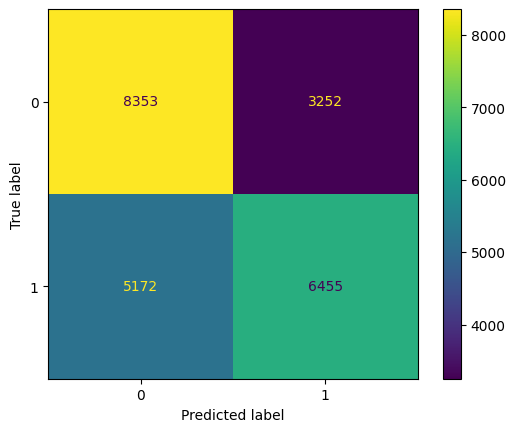

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
 
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [32]:
text = "sleepover with b"
model.predict(vectorizer.transform([text]))[0]

1